In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
! pip install imblearn
! pip install mlxtend
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
! pip install plotly.express
import plotly.express as px
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [101]:
df = pd.read_csv("DATA-Monkeypox.csv") # upload data

In [102]:
df # to see dataframe in rows and columns

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [103]:
df.shape # tells how many rows and columns are present in data

(25000, 11)

In [104]:
print(df.info()) # tells about data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB
None


In [105]:
print(df.isnull().sum())#checking for null values i.e missing values

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64


### Exploratory data analysis

In [106]:
print(df['MonkeyPox'].value_counts()) # count of positives and negative monkeypox patients in data set

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64


In [107]:
# all the features categorical value counts

print(df['Penile Oedema'].value_counts())
print(df['Rectal Pain'].value_counts())
print(df['Oral Lesions'].value_counts())
print(df['Sore Throat'].value_counts())
print(df['Solitary Lesion'].value_counts())
print(df['Swollen Tonsils'].value_counts())
print(df['HIV Infection'].value_counts())
print(df['Sexually Transmitted Infection'].value_counts())

Penile Oedema
True     12612
False    12388
Name: count, dtype: int64
Rectal Pain
False    12655
True     12345
Name: count, dtype: int64
Oral Lesions
False    12514
True     12486
Name: count, dtype: int64
Sore Throat
True     12554
False    12446
Name: count, dtype: int64
Solitary Lesion
True     12527
False    12473
Name: count, dtype: int64
Swollen Tonsils
True     12533
False    12467
Name: count, dtype: int64
HIV Infection
True     12584
False    12416
Name: count, dtype: int64
Sexually Transmitted Infection
False    12554
True     12446
Name: count, dtype: int64


### Data Preparation

In [108]:
# one hot encoding of the systemic illness feature
df=pd.get_dummies(df, columns=['Systemic Illness'])

df['Rectal Pain']=np.where(df['Rectal Pain']==True,1,0)
df['Sore Throat']=np.where(df['Sore Throat']==True,1,0)
df['Penile Oedema']=np.where(df['Penile Oedema']==True,1,0)
df['Oral Lesions']=np.where(df['Oral Lesions']==True,1,0)
df['Swollen Tonsils']=np.where(df['Swollen Tonsils']==True,1,0)
df['HIV Infection']=np.where(df['HIV Infection']==True,1,0)
df['Sexually Transmitted Infection']=np.where(df['Sexually Transmitted Infection']==True,1,0)
df['MonkeyPox']=np.where(df['MonkeyPox']=="Positive",1,0)
df['Solitary Lesion']=np.where(df['Solitary Lesion']==True,1,0)
df['Systemic Illness_Fever']=np.where(df['Systemic Illness_Fever']==True,1,0)
df['Systemic Illness_Muscle Aches and Pain']=np.where(df['Systemic Illness_Muscle Aches and Pain']==True,1,0)
df['Systemic Illness_Swollen Lymph Nodes']=np.where(df['Systemic Illness_Swollen Lymph Nodes']==True,1,0)
df

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes
0,P0,0,1,1,1,0,1,0,0,0,0,0,0
1,P1,1,0,1,1,0,0,1,0,1,1,0,0
2,P2,0,1,1,0,0,0,1,0,1,1,0,0
3,P3,1,0,0,0,1,1,1,0,1,0,0,0
4,P4,1,1,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,1,1,0,1,1,0,0,1,1,0,0,0
24996,P24996,0,1,1,0,1,1,1,1,1,1,0,0
24997,P24997,1,1,0,0,1,1,0,0,1,0,0,0
24998,P24998,0,1,0,1,1,1,0,0,0,0,0,1


In [109]:
# removal of features patient id and systemic illness with none

df=df.drop(['Patient_ID'],axis=1)
df

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,1,1,0,0
2,0,1,1,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,1,1,0,1,0,0,0
4,1,1,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,1,0,0,0
24996,0,1,1,0,1,1,1,1,1,1,0,0
24997,1,1,0,0,1,1,0,0,1,0,0,0
24998,0,1,0,1,1,1,0,0,0,0,0,1


In [110]:
# test train split

x=df.drop(['MonkeyPox'],axis=1) # seperating independ features
y=df['MonkeyPox'] # dependent feature
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20,random_state=30) # split

### Modelling on imbalanced data

#### Logistic Regression

Optimized weights of logistic regression model [[ 0.64490931  0.28900568  0.25102448  0.28056564  0.17707125  0.09335298
   0.67714461  0.56275593  1.01605185 -0.02548456  0.92298029]] Bias or intercept of model  [-1.33813179]
Accuracy: 68.89%
Precision: 70.85%
Recall: 86.68%
F1_Score: 77.97%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

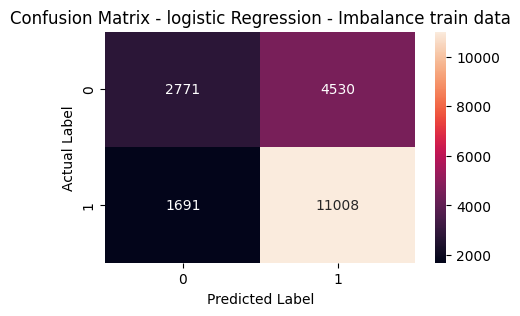

In [111]:
# Logistic regression model on imbalance data
modelLogistic_1 = LogisticRegression(penalty='none',solver='sag')   # model building
modelLogistic_1.fit(x_train,y_train) # training model on train data
print("Optimized weights of logistic regression model",modelLogistic_1.coef_, "Bias or intercept of model ", modelLogistic_1.intercept_)
y_pred_lt= modelLogistic_1.predict(x_train) # testing on train data

# evaluation metrics

print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_pred_lt) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train, y_pred_lt) * 100))
print('Recall: %.2f%%' % (recall_score(y_train, y_pred_lt) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train, y_pred_lt) * 100))

# confusion matrix
confusionmatrix = confusion_matrix(y_train, y_pred_lt)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - logistic Regression - Imbalance train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 70.14%
Precision: 72.17%
Recall: 87.07%
F1_Score: 78.92%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

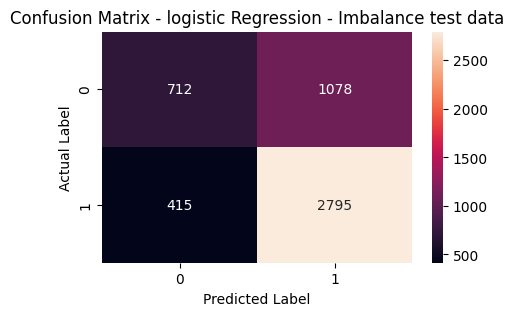

In [112]:
 # testing trained model on test data
    
y_pred_l= modelLogistic_1.predict(x_test) # trained model testing on test data

# evaluation metrics

print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_l) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_l) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_l) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_l) * 100))
confusionmatrix = confusion_matrix(y_test, y_pred_l)
plt.figure(figsize=(5,3))
ax = plt.subplot()

# confusion matrix

sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - logistic Regression - Imbalance test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### Random Forest 

Accuracy: 70.45%
Precision: 71.77%
Recall: 88.12%
F1_Score: 79.11%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

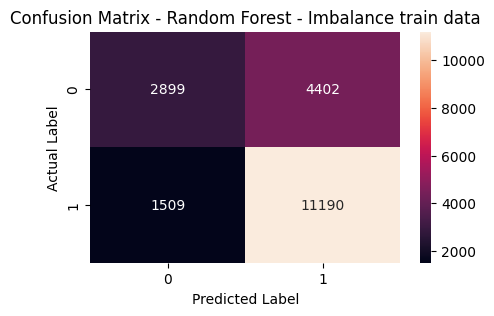

In [113]:
# Random forest on imbalance data

modelRandomForest_1 = RandomForestClassifier(random_state=30)  # model building
modelRandomForest_1.fit(x_train,y_train)     # training model on train data
y_pred_Rt1= modelRandomForest_1.predict(x_train)  # predicting on train data

# evalauation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_pred_Rt1) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train, y_pred_Rt1) * 100))
print('Recall: %.2f%%' % (recall_score(y_train, y_pred_Rt1) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train, y_pred_Rt1) * 100))

# confusion matrix

confusionmatrix = confusion_matrix(y_train, y_pred_Rt1)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest - Imbalance train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 68.40%
Precision: 71.01%
Recall: 85.83%
F1_Score: 77.72%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

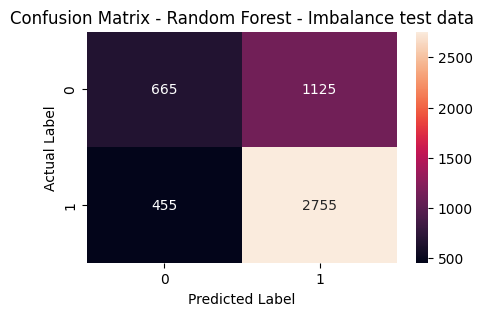

In [114]:
# testing trained model on test data
    
y_pred_Rtest= modelRandomForest_1.predict(x_test)

#Evaluation metrics for test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_Rtest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_Rtest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_Rtest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_Rtest) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test, y_pred_Rtest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest - Imbalance test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### Naive Bayes

Accuracy: 68.17%
Precision: 70.01%
Recall: 87.25%
F1_Score: 77.69%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

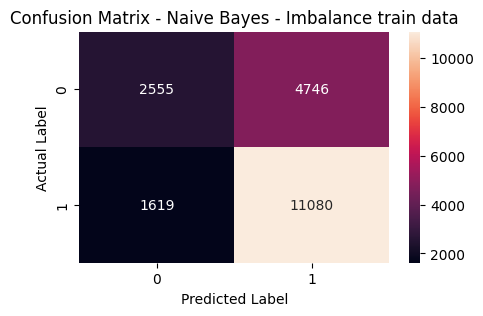

In [115]:
# Naive Bayes on imbalance d data

modelNaiveBayes_1 = BernoulliNB() # model building
modelNaiveBayes_1.fit(x_train,y_train) # training model on training data
y_pred_NB1= modelNaiveBayes_1.predict(x_train) # model predicting on train data

# model performance based on evaluation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_pred_NB1) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train, y_pred_NB1) * 100))
print('Recall: %.2f%%' % (recall_score(y_train, y_pred_NB1) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train, y_pred_NB1) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_train, y_pred_NB1)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Naive Bayes - Imbalance train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 69.48%
Precision: 71.23%
Recall: 88.01%
F1_Score: 78.73%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

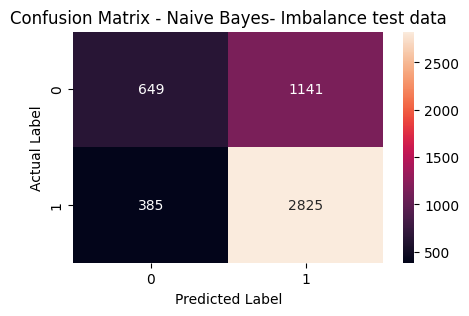

In [116]:
# testing trained model on test data

y_pred_NBtest= modelNaiveBayes_1.predict(x_test)

# model performance based on evaluation metrics on test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_NBtest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_NBtest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_NBtest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_NBtest) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test, y_pred_NBtest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Naive Bayes- Imbalance test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### SVM

Accuracy: 70.03%
Precision: 70.68%
Recall: 90.23%
F1_Score: 79.27%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

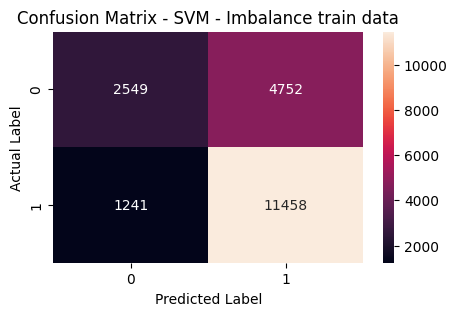

In [117]:
# SVM on imbalaced data

modelSVM_1 = SVC(gamma=0.8,C=1,random_state=47) # model building 
modelSVM_1.fit(x_train,y_train) # training model on train data
y_pred_SV1= modelSVM_1.predict(x_train) # test model on train data

# model performance based on evaluation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_pred_SV1) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train, y_pred_SV1) * 100))
print('Recall: %.2f%%' % (recall_score(y_train, y_pred_SV1) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train, y_pred_SV1) * 100))

# Confusion Matrix

confusionmatrix = confusion_matrix(y_train, y_pred_SV1)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - SVM - Imbalance train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 69.70%
Precision: 70.91%
Recall: 89.53%
F1_Score: 79.14%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

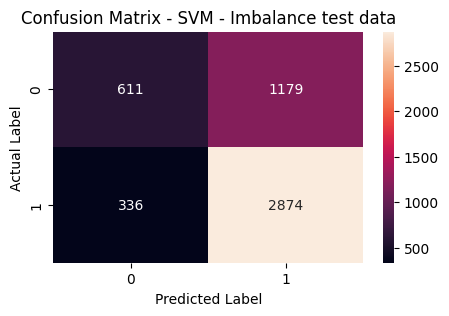

In [118]:
# testing trained model on test data

y_pred_SVtest= modelSVM_1.predict(x_test)

# model performance based on evaluation metrics on test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_SVtest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_SVtest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_SVtest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_SVtest) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test, y_pred_SVtest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - SVM - Imbalance test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

### Chi-square test

In [119]:
# fitting chi square algorithm on train data
f_pvalues=chi2(x_train, y_train) 
f_pvalues # priniting chi2 values and p values

(array([203.9486428 ,  37.63646493,  30.3557171 ,  33.13151778,
         14.6615114 ,   2.62302148, 210.38639822, 141.7210842 ,
        272.38700579, 235.81540081, 184.98457216]),
 array([2.87204099e-46, 8.52360693e-10, 3.59645406e-08, 8.61311921e-09,
        1.28646551e-04, 1.05323716e-01, 1.13126676e-47, 1.11909832e-32,
        3.42515369e-61, 3.21490228e-53, 3.95517791e-42]))

In [120]:
p_values=pd.Series(f_pvalues[1])
p_values.index=x_train.columns
p_values.sort_values() # p values

Systemic Illness_Fever                    3.425154e-61
Systemic Illness_Muscle Aches and Pain    3.214902e-53
HIV Infection                             1.131267e-47
Rectal Pain                               2.872041e-46
Systemic Illness_Swollen Lymph Nodes      3.955178e-42
Sexually Transmitted Infection            1.119098e-32
Sore Throat                               8.523607e-10
Oral Lesions                              8.613119e-09
Penile Oedema                             3.596454e-08
Solitary Lesion                           1.286466e-04
Swollen Tonsils                           1.053237e-01
dtype: float64

In [121]:
chi_values=pd.Series(f_pvalues[0])
chi_values.index=x_train.columns
chi_values.sort_values() # chi2 values

Swollen Tonsils                             2.623021
Solitary Lesion                            14.661511
Penile Oedema                              30.355717
Oral Lesions                               33.131518
Sore Throat                                37.636465
Sexually Transmitted Infection            141.721084
Systemic Illness_Swollen Lymph Nodes      184.984572
Rectal Pain                               203.948643
HIV Infection                             210.386398
Systemic Illness_Muscle Aches and Pain    235.815401
Systemic Illness_Fever                    272.387006
dtype: float64

In [122]:
x=df.drop(['MonkeyPox'],axis=1)
y=df['MonkeyPox']

In [123]:
x.head()
x.shape

(25000, 11)

### Balancing data

In [124]:
# balancing data using under sampling 
# using logistic regression in instance hardness threshold algorithm or method
i_h_t = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(         
                                    solver='sag', multi_class='auto')) 
X_resampled, y_resampled = i_h_t.fit_resample(x, y)

### Test Train Split

In [125]:
# splitting balanced data in train and test data in 80:20 ratio
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_resampled,y_resampled, test_size= 0.20,random_state=30)

In [126]:
# No.of rows and columns of the train and test of input features 
x_train_1.shape , x_test_1.shape 

((14548, 11), (3637, 11))

### Modelling on balanced data

#### Logistic regression

Optimized weights of logistic regression model [[ 1.69791007  0.85361718  0.78037982  0.68951234  0.59646217  0.22821609
   1.88260471  1.57735011  2.98134554 -0.16064928  2.74617378]] Bias or intercept of model  [-6.26474604]
Accuracy: 80.41%
Precision: 78.90%
Recall: 82.84%
F1_Score: 80.82%


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

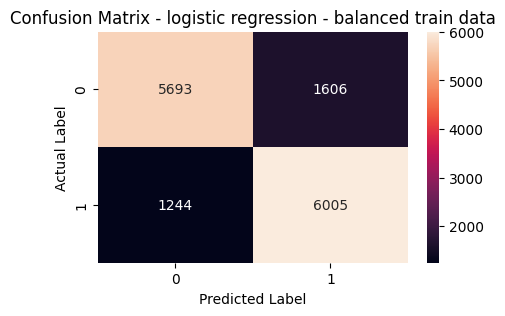

In [127]:
# using logistic regression on balanced data

modelLogistic = LogisticRegression(penalty='none',solver='sag') # model building
modelLogistic.fit(x_train_1,y_train_1) # training model on train data
print("Optimized weights of logistic regression model",modelLogistic.coef_, "Bias or intercept of model ", modelLogistic.intercept_)
y_pred_logtr= modelLogistic.predict(x_train_1) # testing on train data

# evaluation metrics

print('Accuracy: %.2f%%' % (accuracy_score(y_train_1, y_pred_logtr) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train_1, y_pred_logtr) * 100))
print('Recall: %.2f%%' % (recall_score(y_train_1, y_pred_logtr) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train_1, y_pred_logtr) * 100))

# confusion matrix

confusionmatrix = confusion_matrix(y_train_1, y_pred_logtr)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - logistic regression - balanced train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
modelLogistic.get_params(deep=True)

Accuracy: 79.57%
Precision: 78.55%
Recall: 82.17%
F1_Score: 80.32%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

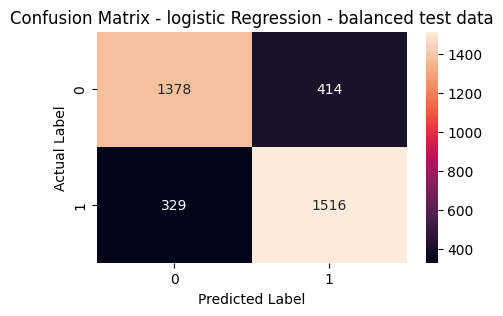

In [128]:
# testing trained model on test data

y_pred_ltest= modelLogistic.predict(x_test_1)

# evaluation metrics

print('Accuracy: %.2f%%' % (accuracy_score(y_test_1, y_pred_ltest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test_1, y_pred_ltest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test_1, y_pred_ltest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test_1, y_pred_ltest) * 100))

# confusion matrix

confusionmatrix = confusion_matrix(y_test_1, y_pred_ltest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - logistic Regression - balanced test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

####  Random forest

Accuracy: 84.85%
Precision: 77.39%
Recall: 98.32%
F1_Score: 86.61%


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

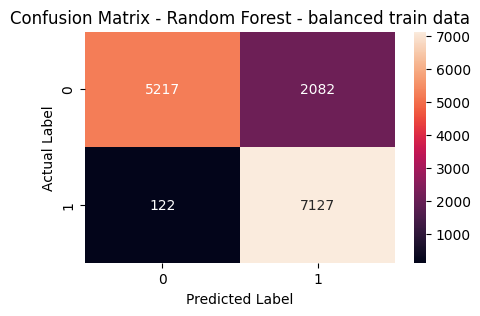

In [129]:
# Random forest on balance data

modelRandomForest = RandomForestClassifier(random_state=30)  # model building
modelRandomForest.fit(x_train_1,y_train_1) # training model on train data
y_pred_Rtrain= modelRandomForest.predict(x_train_1) # predicting on train data

# evalauation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train_1, y_pred_Rtrain) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train_1, y_pred_Rtrain) * 100))
print('Recall: %.2f%%' % (recall_score(y_train_1, y_pred_Rtrain) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train_1, y_pred_Rtrain) * 100))

# confusion matrix

confusionmatrix = confusion_matrix(y_train_1, y_pred_Rtrain)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest - balanced train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
modelRandomForest.get_params(deep=True)

Accuracy: 84.30%
Precision: 77.11%
Recall: 98.21%
F1_Score: 86.39%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

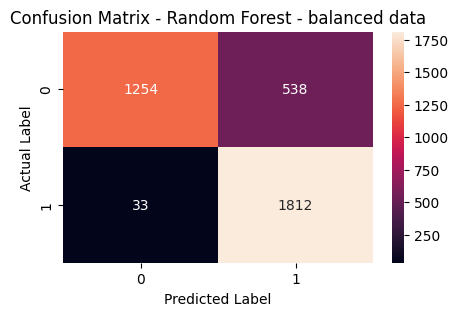

In [130]:
# testing trained model on test data

y_pred_Rt= modelRandomForest.predict(x_test_1)

#Evaluation metrics for test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test_1, y_pred_Rt) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test_1, y_pred_Rt) * 100))
print('Recall: %.2f%%' % (recall_score(y_test_1, y_pred_Rt) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test_1, y_pred_Rt) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test_1, y_pred_Rt)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest - balanced data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### SVM

Accuracy: 84.82%
Precision: 77.26%
Recall: 98.55%
F1_Score: 86.61%


{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.8,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 47,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

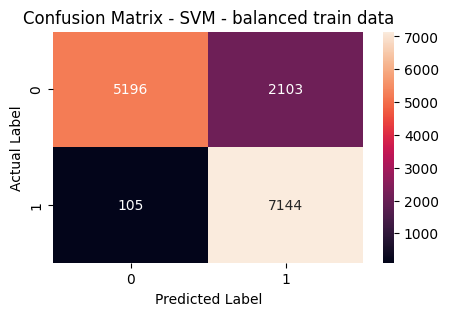

In [131]:
# SVM on balaced data

modelSVM = SVC(gamma=0.8,C=1,random_state=47) # model building 
modelSVM.fit(x_train_1,y_train_1) # training model on train data
y_pred_SVMtrain= modelSVM.predict(x_train_1)  # test model on train data

# model performance based on evaluation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train_1, y_pred_SVMtrain) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train_1, y_pred_SVMtrain) * 100))
print('Recall: %.2f%%' % (recall_score(y_train_1, y_pred_SVMtrain) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train_1, y_pred_SVMtrain) * 100))

# Confusion Matrix

confusionmatrix = confusion_matrix(y_train_1, y_pred_SVMtrain)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - SVM - balanced train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
modelSVM.get_params(deep=True)

Accuracy: 84.41%
Precision: 77.17%
Recall: 98.37%
F1_Score: 86.49%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

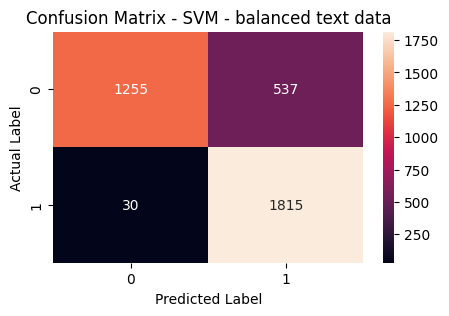

In [132]:
# testing trained model on test data

y_pred_SVMtest= modelSVM.predict(x_test_1)

# model performance based on evaluation metrics on test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test_1, y_pred_SVMtest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test_1, y_pred_SVMtest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test_1, y_pred_SVMtest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test_1, y_pred_SVMtest) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test_1, y_pred_SVMtest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - SVM - balanced text data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### Naive bayes

Accuracy: 80.70%
Precision: 76.36%
Recall: 88.73%
F1_Score: 82.08%


{'alpha': 0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

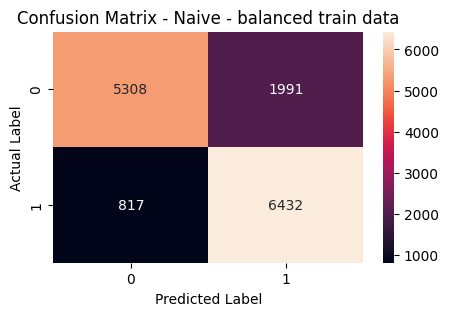

In [133]:
# Naive Bayes on balance d data

modelNB = BernoulliNB(alpha=0) # model building
modelNB.fit(x_train_1,y_train_1) # training model on training data
y_pred_NBtrain= modelNB.predict(x_train_1)  # model predicting on train data

# model performance based on evaluation metrics on train data

print('Accuracy: %.2f%%' % (accuracy_score(y_train_1, y_pred_NBtrain) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train_1, y_pred_NBtrain) * 100))
print('Recall: %.2f%%' % (recall_score(y_train_1, y_pred_NBtrain) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train_1, y_pred_NBtrain) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_train_1, y_pred_NBtrain)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Naive - balanced train data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
modelNB.get_params(deep=True)

Accuracy: 80.26%
Precision: 76.67%
Recall: 87.80%
F1_Score: 81.86%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

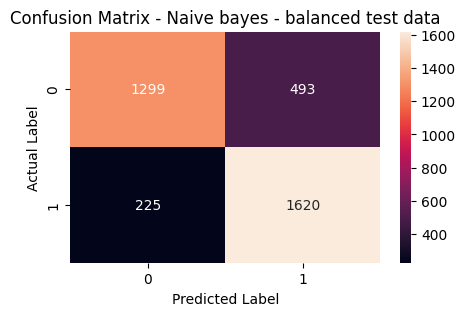

In [134]:
# testing trained model on test data

y_pred_NBtest= modelNB.predict(x_test_1)

# model performance based on evaluation metrics on test data

print('Accuracy: %.2f%%' % (accuracy_score(y_test_1, y_pred_NBtest) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test_1, y_pred_NBtest) * 100))
print('Recall: %.2f%%' % (recall_score(y_test_1, y_pred_NBtest) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test_1, y_pred_NBtest) * 100))

# Confusion matrix

confusionmatrix = confusion_matrix(y_test_1, y_pred_NBtest)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Naive bayes - balanced test data')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

### Plots based on evaluation metrics

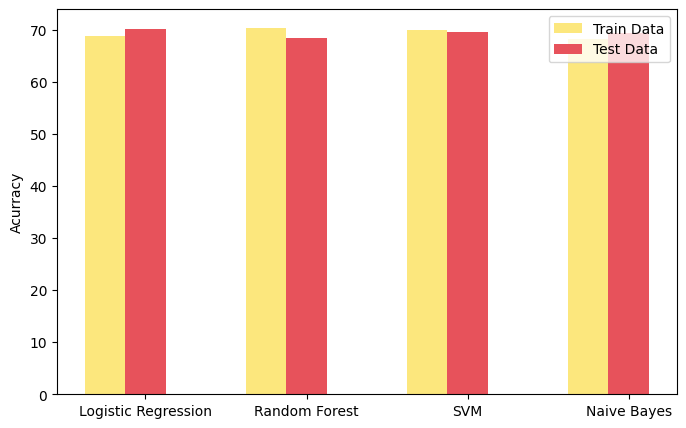

In [135]:
# algorithms acurracy on imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_1 = [68.89, 70.45, 70.03, 68.17]
test_2 = [70.14, 68.40, 69.70, 69.48]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_1))], algorithms)
plt.ylabel('Acurracy')
plt.legend()
plt.show()

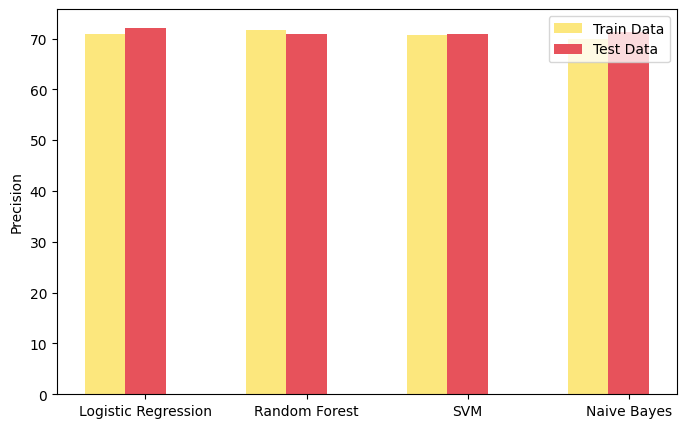

In [136]:
# algorithms precison on imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_p1 = [70.85, 71.77, 70.68, 70.01]
test_p2 = [72.17, 71.01, 70.91, 71.23]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_p1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_p1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_p2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_p1))], algorithms)
plt.ylabel('Precision')
plt.legend()
plt.show()

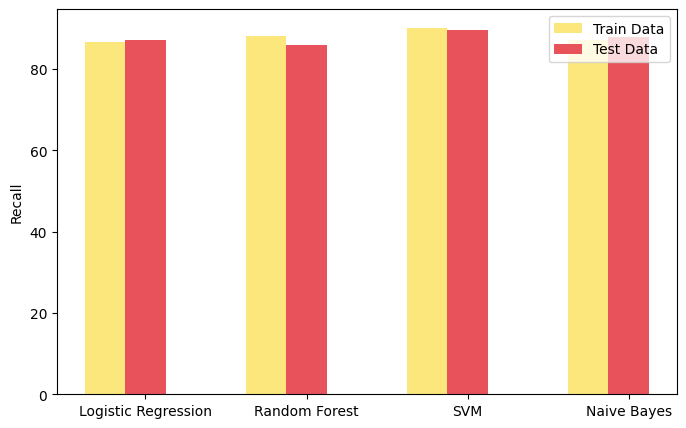

In [137]:
# algorithms recall on imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_r1 = [86.68, 88.12, 90.23, 87.25]
test_r2 = [87.07, 85.83, 89.53, 88.01]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_r1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_r1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_r2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_r1))], algorithms)
plt.ylabel('Recall')
plt.legend()
plt.show()

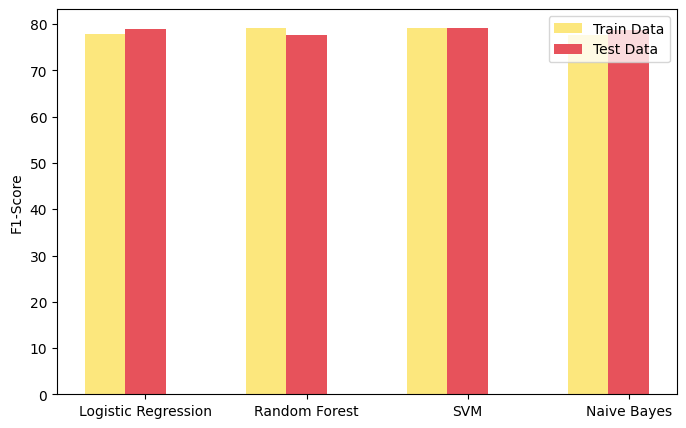

In [138]:
# algorithms F1 score on imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_f1 = [77.97, 79.11, 79.27, 77.69]
test_f2 = [78.92, 77.72, 79.14, 78.73]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_f1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_f1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_f2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_f1))], algorithms)
plt.ylabel('F1-Score')
plt.legend()
plt.show()

#### Balanced Data

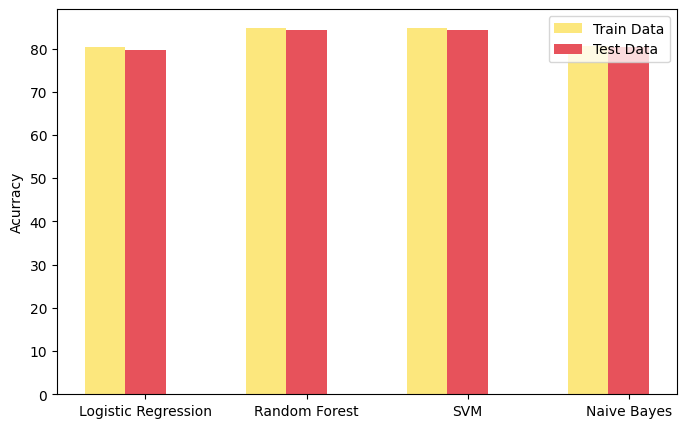

In [139]:
# algorithms acurracy score on balanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_1 = [80.41, 84.85, 84.82, 80.70]
test_2 = [79.57, 84.30, 84.41, 80.26]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_1))], algorithms)
plt.ylabel('Acurracy')
plt.legend()
plt.show()

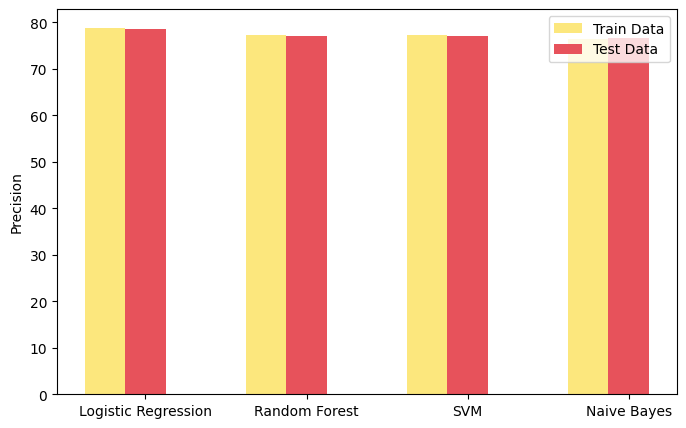

In [140]:
# algorithms precision score on balanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_p1 = [78.90, 77.39, 77.26, 76.36]
test_p2 = [78.55, 77.11, 77.17, 76.67]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_p1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_p1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_p2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_p1))], algorithms)
plt.ylabel('Precision')
plt.legend()
plt.show()

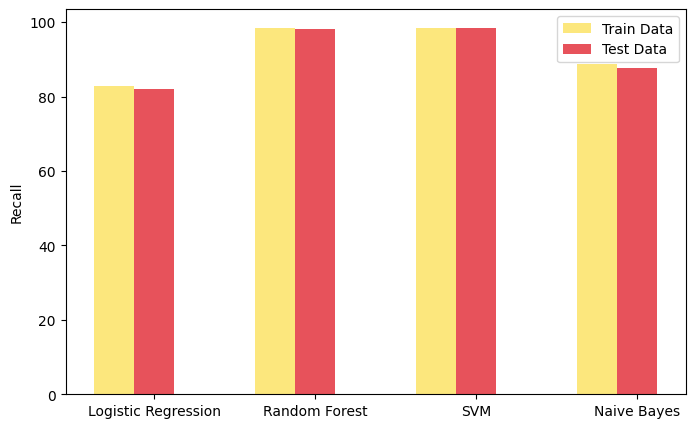

In [141]:
# algorithms recall score on balanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_r1 = [82.84, 98.32, 98.55, 88.73]
test_r2 = [82.17, 98.21, 98.37, 87.80]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_r1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_r1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_r2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_r1))], algorithms)
plt.ylabel('Recall')
plt.legend()
plt.show()

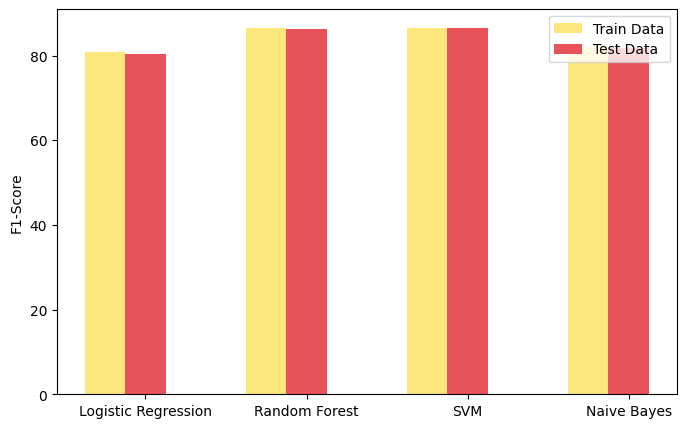

In [142]:
# algorithms F1 score on balanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_f1 = [80.82, 86.61, 86.61, 82.08]
test_f2 = [80.32, 86.39, 86.49, 81.86]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_f1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_f1, width=bar_width, label='Train Data',color='#FCE77D')
plt.bar(r2, test_f2, width=bar_width, label='Test Data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_f1))], algorithms)
plt.ylabel('F1-Score')
plt.legend()
plt.show()

Test data balance vs imbalance

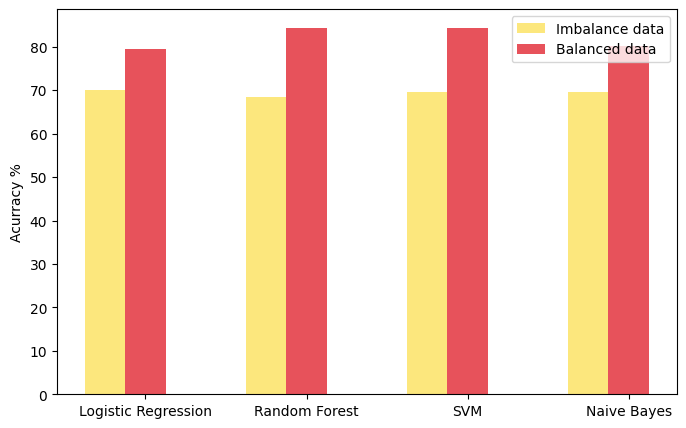

In [143]:
# algorithms acurracy score on test balanced and imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_1 = [70.14, 68.40, 69.70, 69.48]
test_2 = [79.57, 84.30, 84.41, 80.26]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_1, width=bar_width, label='Imbalance data',color='#FCE77D')
plt.bar(r2, test_2, width=bar_width, label='Balanced data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_1))], algorithms)
plt.ylabel('Acurracy %')
plt.legend()
plt.show()

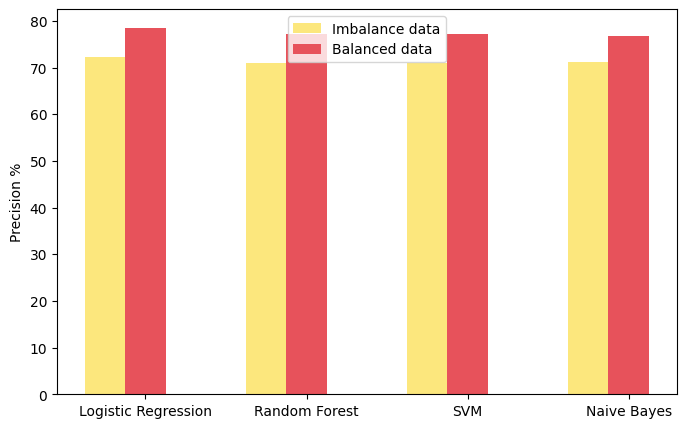

In [144]:
# algorithms precion score on test balanced and imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_p1 = [72.17, 71.01, 70.91, 71.23]
test_p2 = [78.55, 77.11, 77.17, 76.67]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_p1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_p1, width=bar_width, label='Imbalance data',color='#FCE77D')
plt.bar(r2, test_p2, width=bar_width, label='Balanced data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_p1))], algorithms)
plt.ylabel('Precision %')
plt.legend()
plt.show()

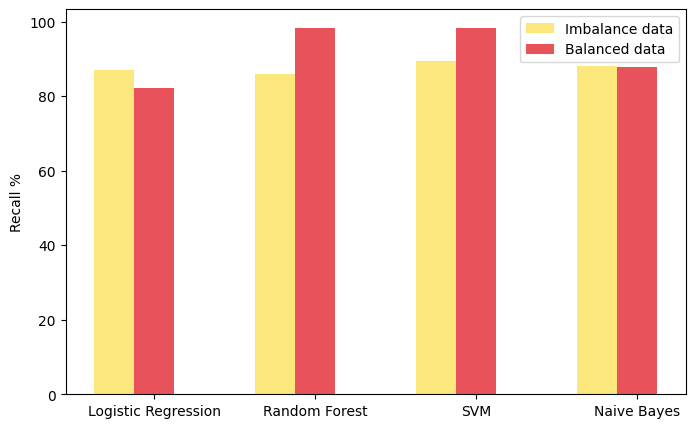

In [145]:
# algorithms recall score on test balanced and imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_r1 = [87.07, 85.83, 89.53, 88.01]
test_r2 = [82.17, 98.21, 98.37, 87.80]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_r1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_r1, width=bar_width, label='Imbalance data',color='#FCE77D')
plt.bar(r2, test_r2, width=bar_width, label='Balanced data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_r1))], algorithms)
plt.ylabel('Recall %')
plt.legend()
plt.show()

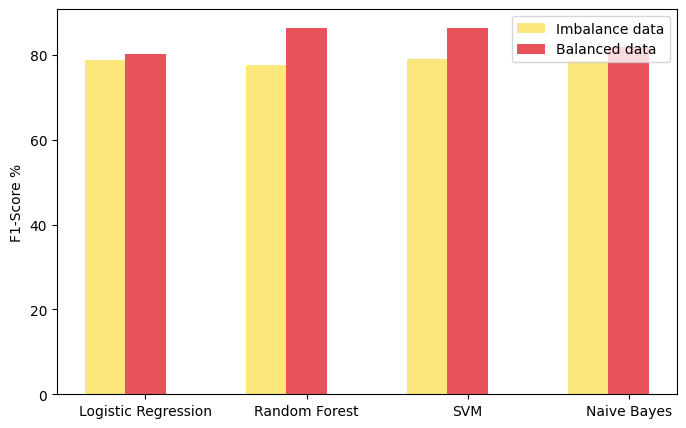

In [146]:
# algorithms F1 score on test balanced and imbalanced data

algorithms = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_f1 = [78.92, 77.72, 79.14, 78.73]
test_f2 = [80.32, 86.39, 86.49, 81.86]
bar_width = 0.25
plt.figure(figsize=(8,5))
r1 = np.arange(len(train_f1))
r2 = [x + bar_width for x in r1]
plt.bar(r1, train_f1, width=bar_width, label='Imbalance data',color='#FCE77D')
plt.bar(r2, test_f2, width=bar_width, label='Balanced data', color='#E7525B')
plt.xticks([r + bar_width for r in range(len(train_f1))], algorithms)
plt.ylabel('F1-Score %')
plt.legend()
plt.show()

In [147]:
import pickle
# open a file, where you ant to store the data
file = open('Model_pox.pkl', 'wb')

# dump information to that file
pickle.dump(modelRandomForest, file)